<a href="https://colab.research.google.com/github/RavitejaGundimeda/Pattern-Recognition---Python/blob/main/Knn_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/RavitejaGundimeda/Pattern-Recognition---Python/blob/main/MultiVariate_Gaussian_Density.ipynb

Use K nearest neighbour classification algorithm to show how it performs on the three 
types of overlap situations.

*******************************************************************
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


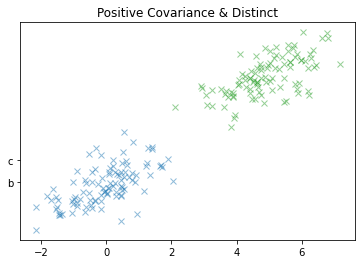

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.figure_factory as ff


def multi_class_norm_plot_df(means, data_sizes, cov, title):
    colours = ['b','c','r','g','m']
    classes = len(means)
    x_points, y_points, output_class = [],[],[]
    X_full,y_full = [],[]
    class_value = 0 
    for i in range(classes):
        x, y = np.random.multivariate_normal(means[i], cov, data_sizes[i]).T
        for j in range(data_sizes[i]):
            X_full.append([x[j],y[j]])
            y_full.append(class_value)
        class_value +=1
        plt.title(title)
        plt.plot(x, y,'x',colours[i], alpha = 0.5)
        
    return np.array(X_full),np.array(y_full)

#Negative covariance
neg_cov = [[1, -0.7], [-0.7, 1]]
#Positive covariance
pos_cov = [[1, 0.7], [0.7, 1]]



#Input means for totally distinct classes
means = [[0,0],[5,5]]
#Input data size's for totally distinct classes
data_sizes = [100,100]
#Plotting as sub - plot
plt.plot()
X,y = multi_class_norm_plot_df(means, data_sizes, pos_cov, "Positive Covariance & Distinct")
print("*******************************************************************")
print(y)

Plots of the various classifications

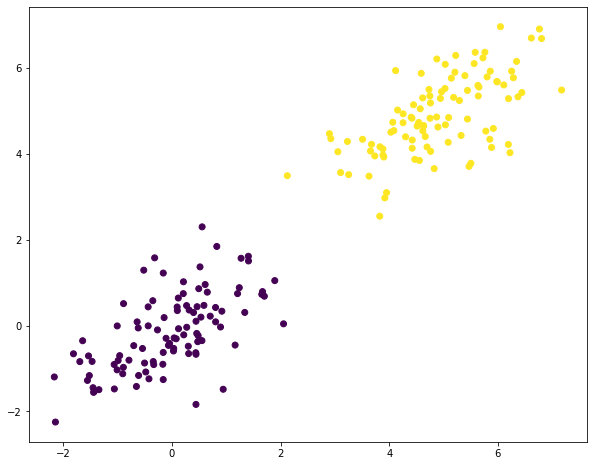

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

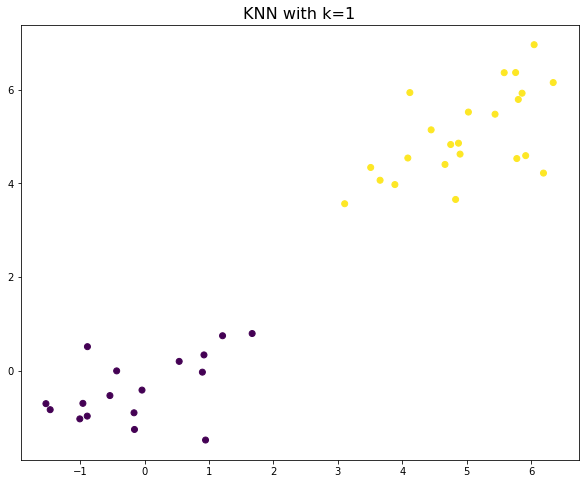

In [ ]:
#Implementing K-nn Classifier
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
#Fitting K-nn Classifier to training set
knn1.fit(X_train, y_train)
#Predicting test set result
predict1 = knn1.predict(X_test)
plt.figure(figsize=(10,8))
plt.title("KNN with k=1", fontsize=16)
#Plotting using scatter plots
plt.scatter(X_test[:,0], X_test[:,1], c=predict1)

Confusion matrices of real class versus classified class

In [ ]:
#Creating confusion matrices
from sklearn.metrics import confusion_matrix,accuracy_score
#Printing confusion matrix and accuracy score
print(confusion_matrix(y_test, predict1))
print(accuracy_score(y_test,predict1) )


[[17  0]
 [ 0 23]]
1.0
